In [1]:
import pandas as pd
import h5py
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os
from pylab import rcParams
import seaborn as sns

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

 
plt.rcParams['figure.figsize'] =7.8 ,3.9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)

In [2]:
# constants  #
#------------#
HDF5_dir = "E:\\MessdatenStoeckach\\"
resampled_dir = r'E:\resampled'
dates = os.listdir(HDF5_dir)
phases = ["1","2","3"]

In [3]:
def generateXAxisData():
    return np.linspace(2000, 149950, 2960)

In [4]:
def levels_dbmyV(Vout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    Vout = Vout*230
    Vout[Vout<1e-6] = 1e-6
    Vout = Vout/1e-6
    Vout = np.log10(Vout)
    Vout = Vout*20
    return Vout

In [5]:
def levels_dbmyA(Aout):
    """ calcs the voltage levels
    / replaces 0 with 1e-3
    / dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV
    / 1V = 120dbmyV
    /dBμV or dBuV (decibel microvolt, amplitude ratio) — absolute voltage in decibels relative to one microvolt, 
    used to measure the signal strength in RF and audio cables. That is dBμV = 20log₁₀(VOUT/1μV) where VOUT in μV. This shows that dBμV is independent of impedance. Since it is the ratio of two voltages, they can be measured as peak-to-peak or RMS and with the same units. Reference voltage 1 μV.
    """
    Aout[Aout<1e-6] = 1e-6
    Aout = Aout/1e-6
    Aout = np.log10(Aout)
    Aout = Aout*20
    return Aout

In [6]:
# Weekend days
wedays = pd.date_range(start="2017-03-02", end="2018-02-17")
wedays = wedays[wedays.dayofweek > 4].strftime("%Y-%m-%d").astype(str).to_list()

In [7]:
# Businessdays
bdstrlist = pd.bdate_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()

In [8]:
#Winter
winterdays = pd.date_range(start="2017-12-21", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
winterdays += pd.date_range(start="2017-03-02", end="2017-03-20").strftime("%Y-%m-%d").astype(str).to_list()

In [9]:
#Summer
summerdays = pd.date_range(start="2017-06-21", end="2017-09-22").strftime("%Y-%m-%d").astype(str).to_list()

In [10]:
# All Measurements
alldays = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()

In [11]:
# Jan - Feb - März
janMar = pd.date_range(start="2018-01-01", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
janMar += pd.date_range(start="2017-03-02", end="2017-03-31").strftime("%Y-%m-%d").astype(str).to_list()

In [12]:
# Apr - Mai - Juni
aprJun = pd.date_range(start="2017-04-01", end="2017-06-30").strftime("%Y-%m-%d").astype(str).to_list()

In [13]:
# Juli - August - September
julSept = pd.date_range(start="2017-07-01", end="2017-09-30").strftime("%Y-%m-%d").astype(str).to_list()

In [14]:
# Oktober - November - Dezember
oktDez = pd.date_range(start="2017-10-01", end="2017-12-31").strftime("%Y-%m-%d").astype(str).to_list()

In [99]:
datelist = summerdays

In [100]:
sh_u_all = pd.DataFrame()
sh_i_all = pd.DataFrame()
sh_u_outliers_all = pd.DataFrame()
sh_i_outliers_all = pd.DataFrame()
for date in datelist:
    sh_u_all = sh_u_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_mean.p"), ignore_index=True)
    sh_i_all = sh_i_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_mean.p"), ignore_index=True)
    sh_u_outliers_all = sh_u_outliers_all.append(pd.read_pickle("E:\\resampled\\u\\" + date + "_harmonics10min_u_max.p"), ignore_index=True)
    sh_i_outliers_all = sh_i_outliers_all.append(pd.read_pickle("E:\\resampled\\i\\" + date + "_harmonics10min_i_max.p"), ignore_index=True)

In [16]:
rmsi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))

In [63]:
all_rmsi_values = np.hstack((rmsi_all_p1[rmsi_all_p1>2].values, rmsi_all_p2[rmsi_all_p2>2].values,rmsi_all_p3[rmsi_all_p3>2].values))

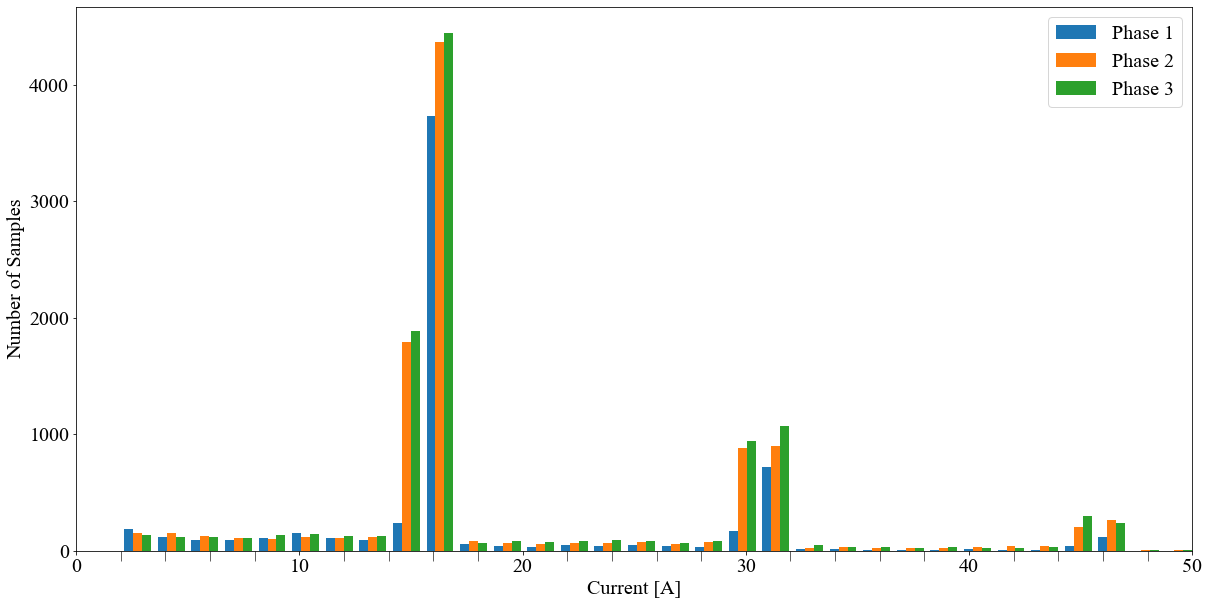

In [64]:
fig, ax = plt.subplots()
colors = ['olive', 'skyblue', 'sandybrown']
ax.hist(all_rmsi_values, 50, density=False, histtype='bar', label=['Phase 1', 'Phase 2','Phase 3'])
ax.legend()
ax.set_xlabel("Current [A]")
ax.set_ylabel('Number of Samples')
ax.set_xlim(0,50)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', length=10)

In [101]:
sh_u_mean = np.mean(sh_u_all, axis=0)
sh_u_perc75 = np.nanpercentile(sh_u_all, 75, axis=0)
sh_u_perc25 = np.nanpercentile(sh_u_all, 25, axis=0)
sh_u_max = np.max(sh_u_all, axis=0)

In [102]:
sh_u_mean_db = levels_dbmyV(sh_u_mean.to_numpy(dtype=np.float32))
sh_u_perc75_db = levels_dbmyV(sh_u_perc75)
sh_u_perc25_db = levels_dbmyV(sh_u_perc25)
sh_u_max_db = levels_dbmyV(sh_u_max.to_numpy(dtype=np.float32))
sh_u_outliers_db = levels_dbmyV(sh_u_outliers_all.max(axis=0).to_numpy(dtype=np.float32))

In [103]:
sh_i_mean = np.mean(sh_i_all, axis=0)
sh_i_perc75 = np.nanpercentile(sh_i_all, 75, axis=0)
sh_i_perc25 = np.nanpercentile(sh_i_all, 25, axis=0)
sh_i_max = np.max(sh_i_all, axis=0)

In [104]:
sh_i_mean_db = levels_dbmyA(sh_i_mean.to_numpy(dtype=np.float32))
sh_i_perc75_db = levels_dbmyA(sh_i_perc75)
sh_i_perc25_db = levels_dbmyA(sh_i_perc25)
sh_i_max_db = levels_dbmyA(sh_i_max.to_numpy(dtype=np.float32))
sh_i_outliers_db = levels_dbmyA(sh_i_outliers_all.max(axis=0).to_numpy(dtype=np.float32))

In [21]:
#limits
#range 2 - 9 kHz (134dbmyV) #
#----------------------------#
f2_9 = [i for i in range(2000, 8999, 50)]
limits2_9 = [134 for i in range(len(f2_9))]
    
# range 9-95 kHz (134dbmyV to 122 dbmyV)  #
#-----------------------------------------#
n = 4000
dbV = np.linspace(134, 122, n)
f9_95 = f = np.logspace(0.9542425094 ,1.9777236053, n ) #9, 95 kHz
# interpolate
xnew = [i for i in range(9000, 94999, 50)]
y = dbV
x = f*1e3
inter = interp1d(x, y)
limits9_95 = dbV_interpolated = inter(xnew)

# range 95 - 150 kHz (122dbmyV) #
#------------------------------#
f95_150 = [i for i in range(95000, 149999, 50)]
limits9_150 = [122 for i in range(len(f95_150))]

limits = limits2_9 + list(limits9_95) + limits9_150 

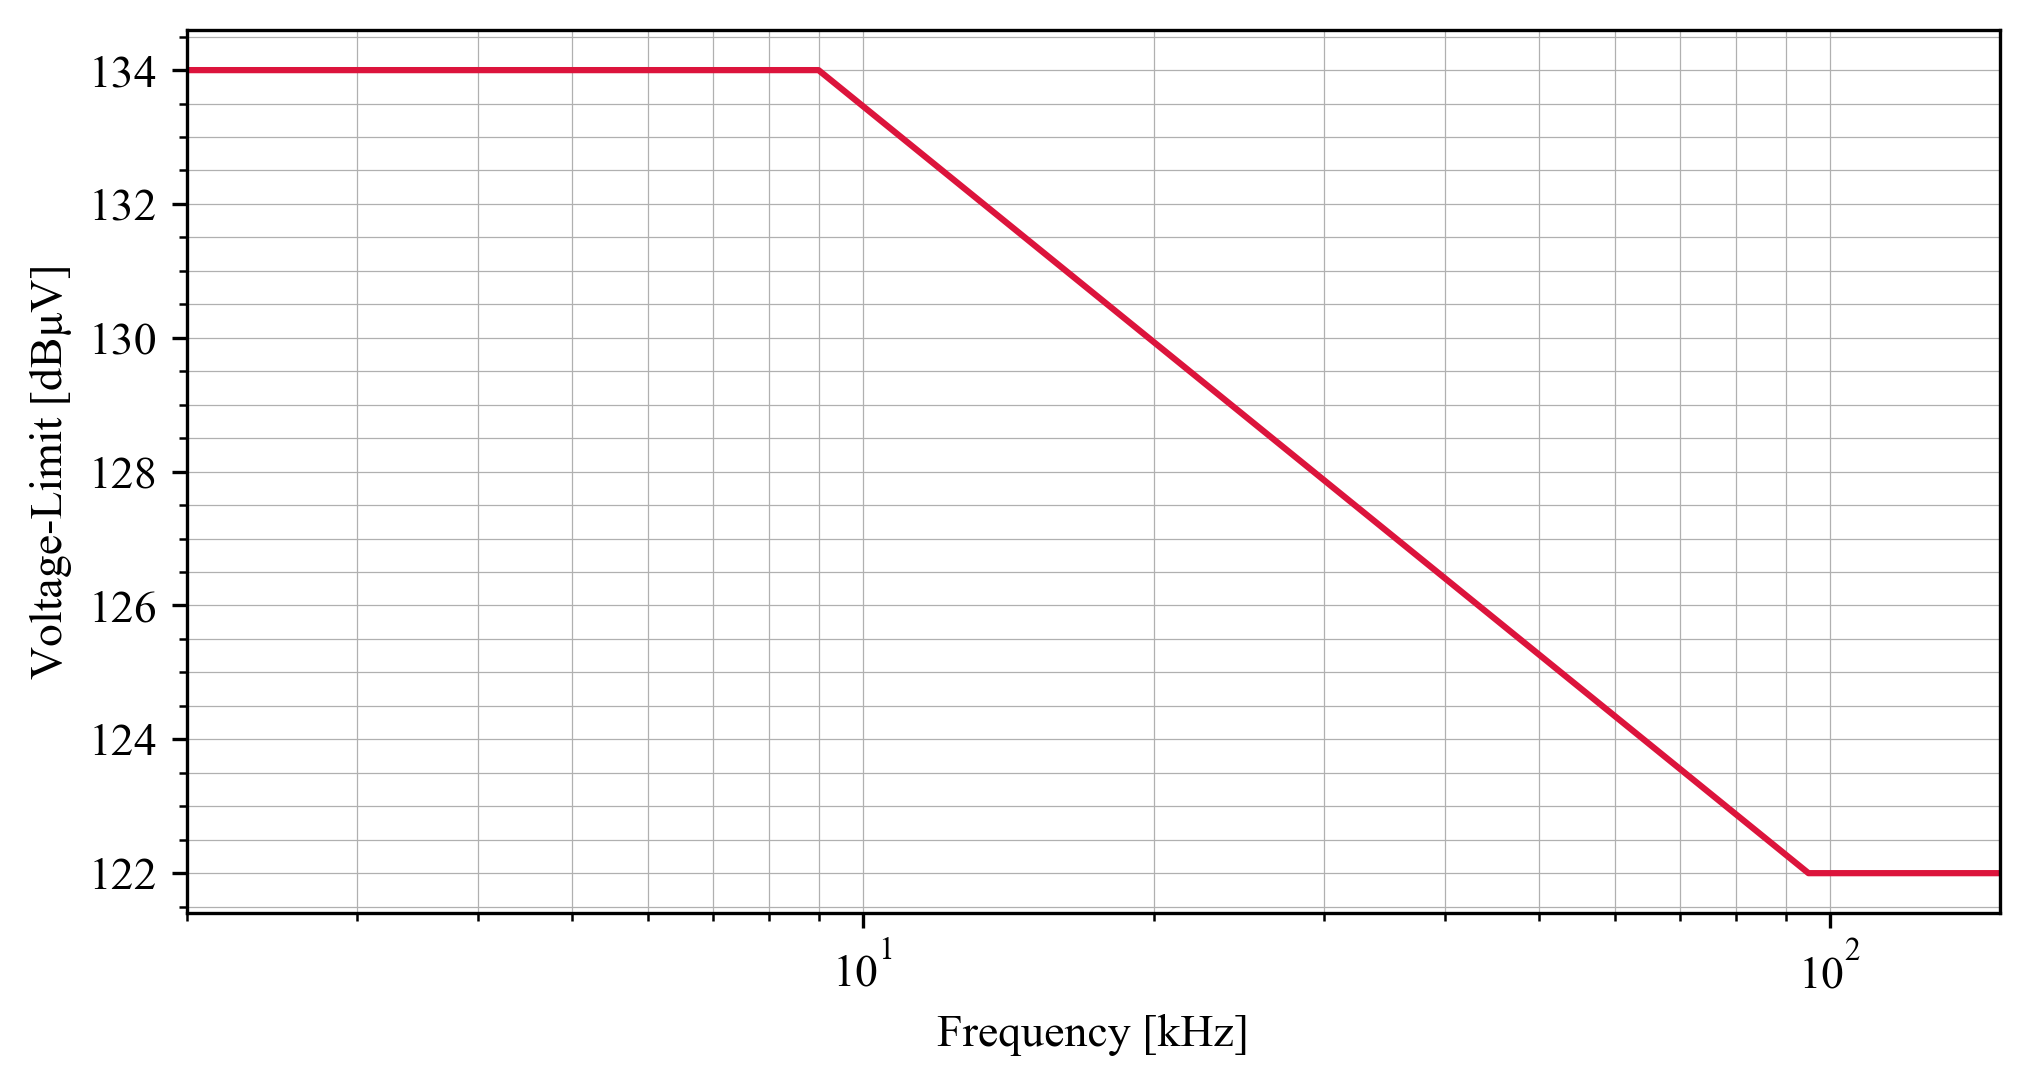

In [90]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
ax.plot(x, limits, color="crimson")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage-Limit [dBμV]')
ax.set_xscale('log')

In [31]:
# Save all to Excel

d = {'limits': limits}

df = pd.DataFrame(data=d)
df.index = x
df.to_excel("limits.xlsx")

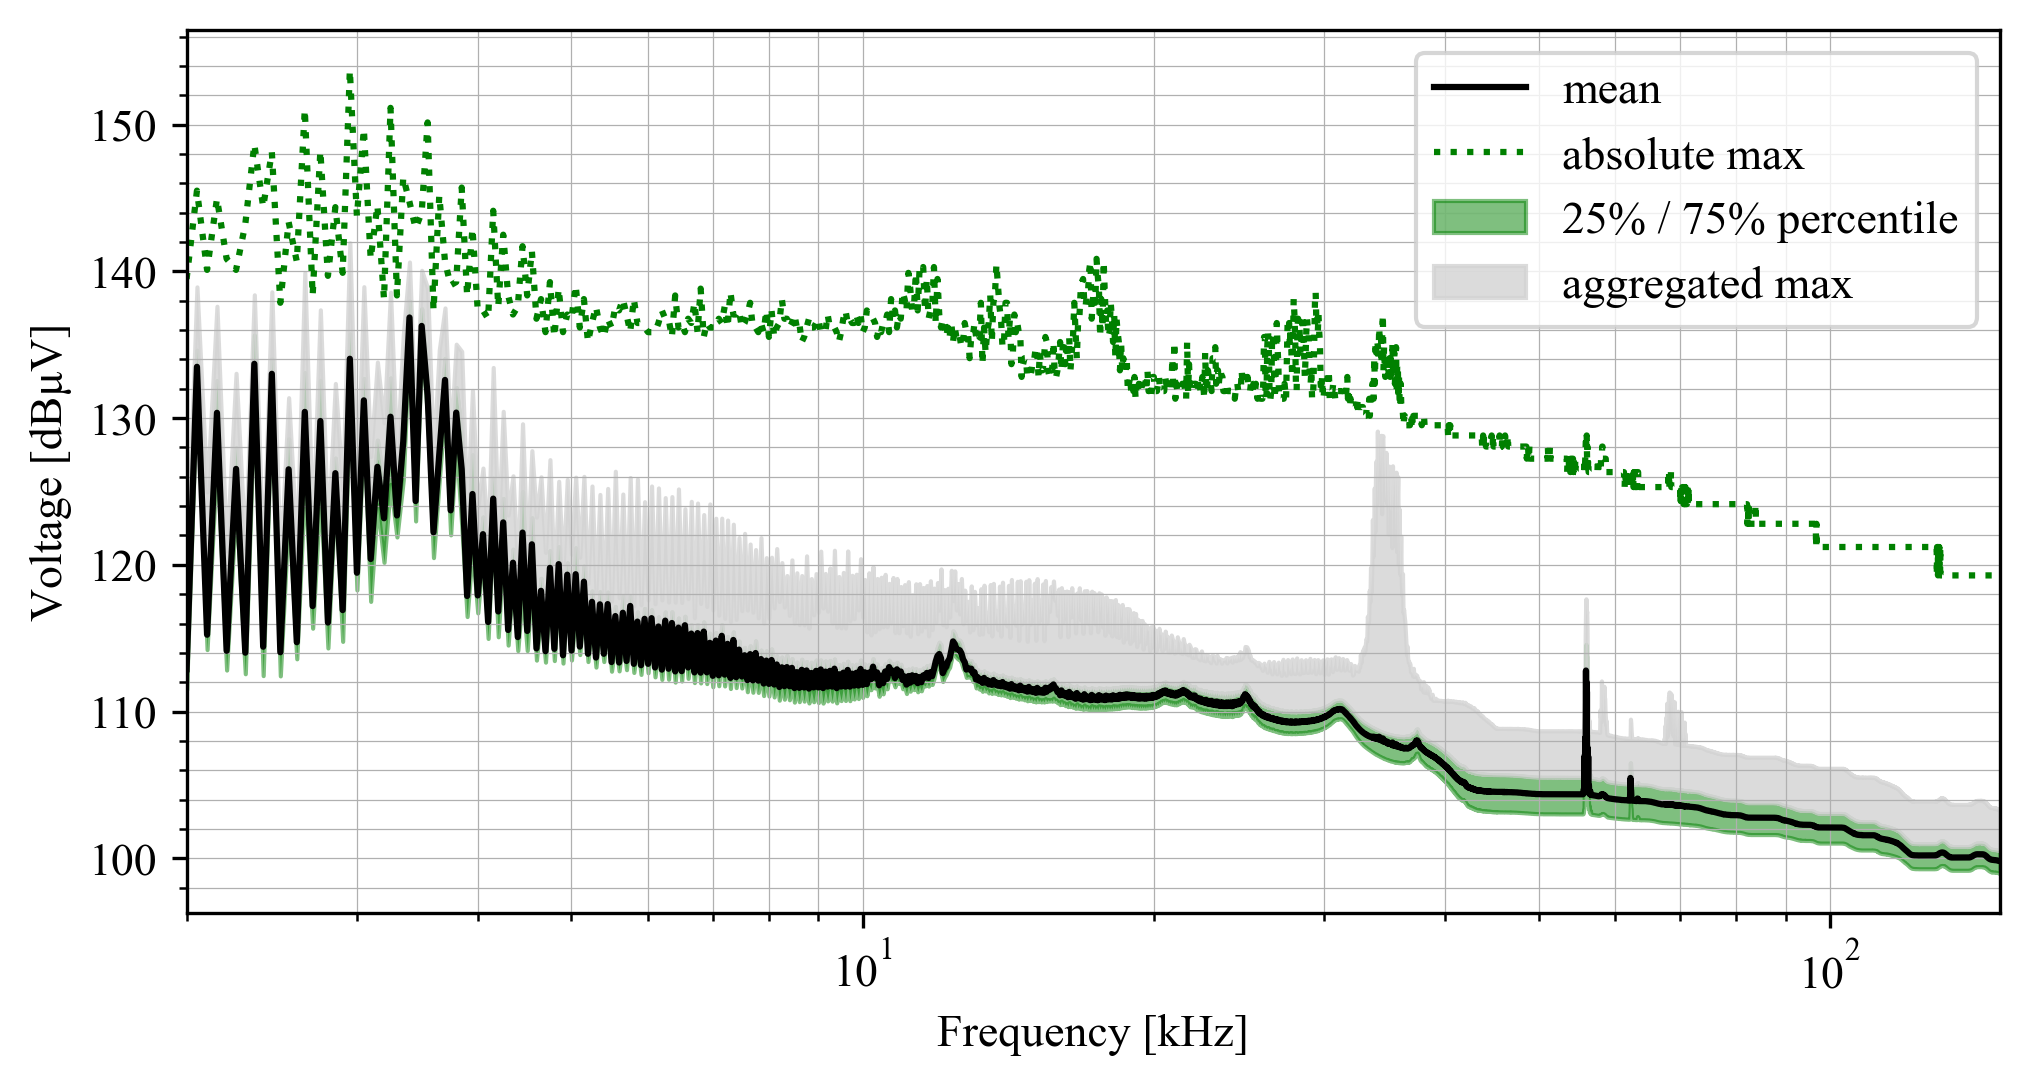

In [105]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
ax.plot(x, sh_u_mean_db, label ="mean", color="k")
ax.fill_between(x, sh_u_perc25_db, sh_u_perc75_db, color='green', alpha=0.5, label="25% / 75% percentile")
ax.fill_between(x, sh_u_perc75_db, sh_u_max_db, color='lightgrey', alpha=0.8, label="aggregated max ")
ax.plot(x, sh_u_outliers_db,":", label ="absolute max", color="green")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Voltage [dBμV]')
ax.set_xscale('log')
ax.legend()

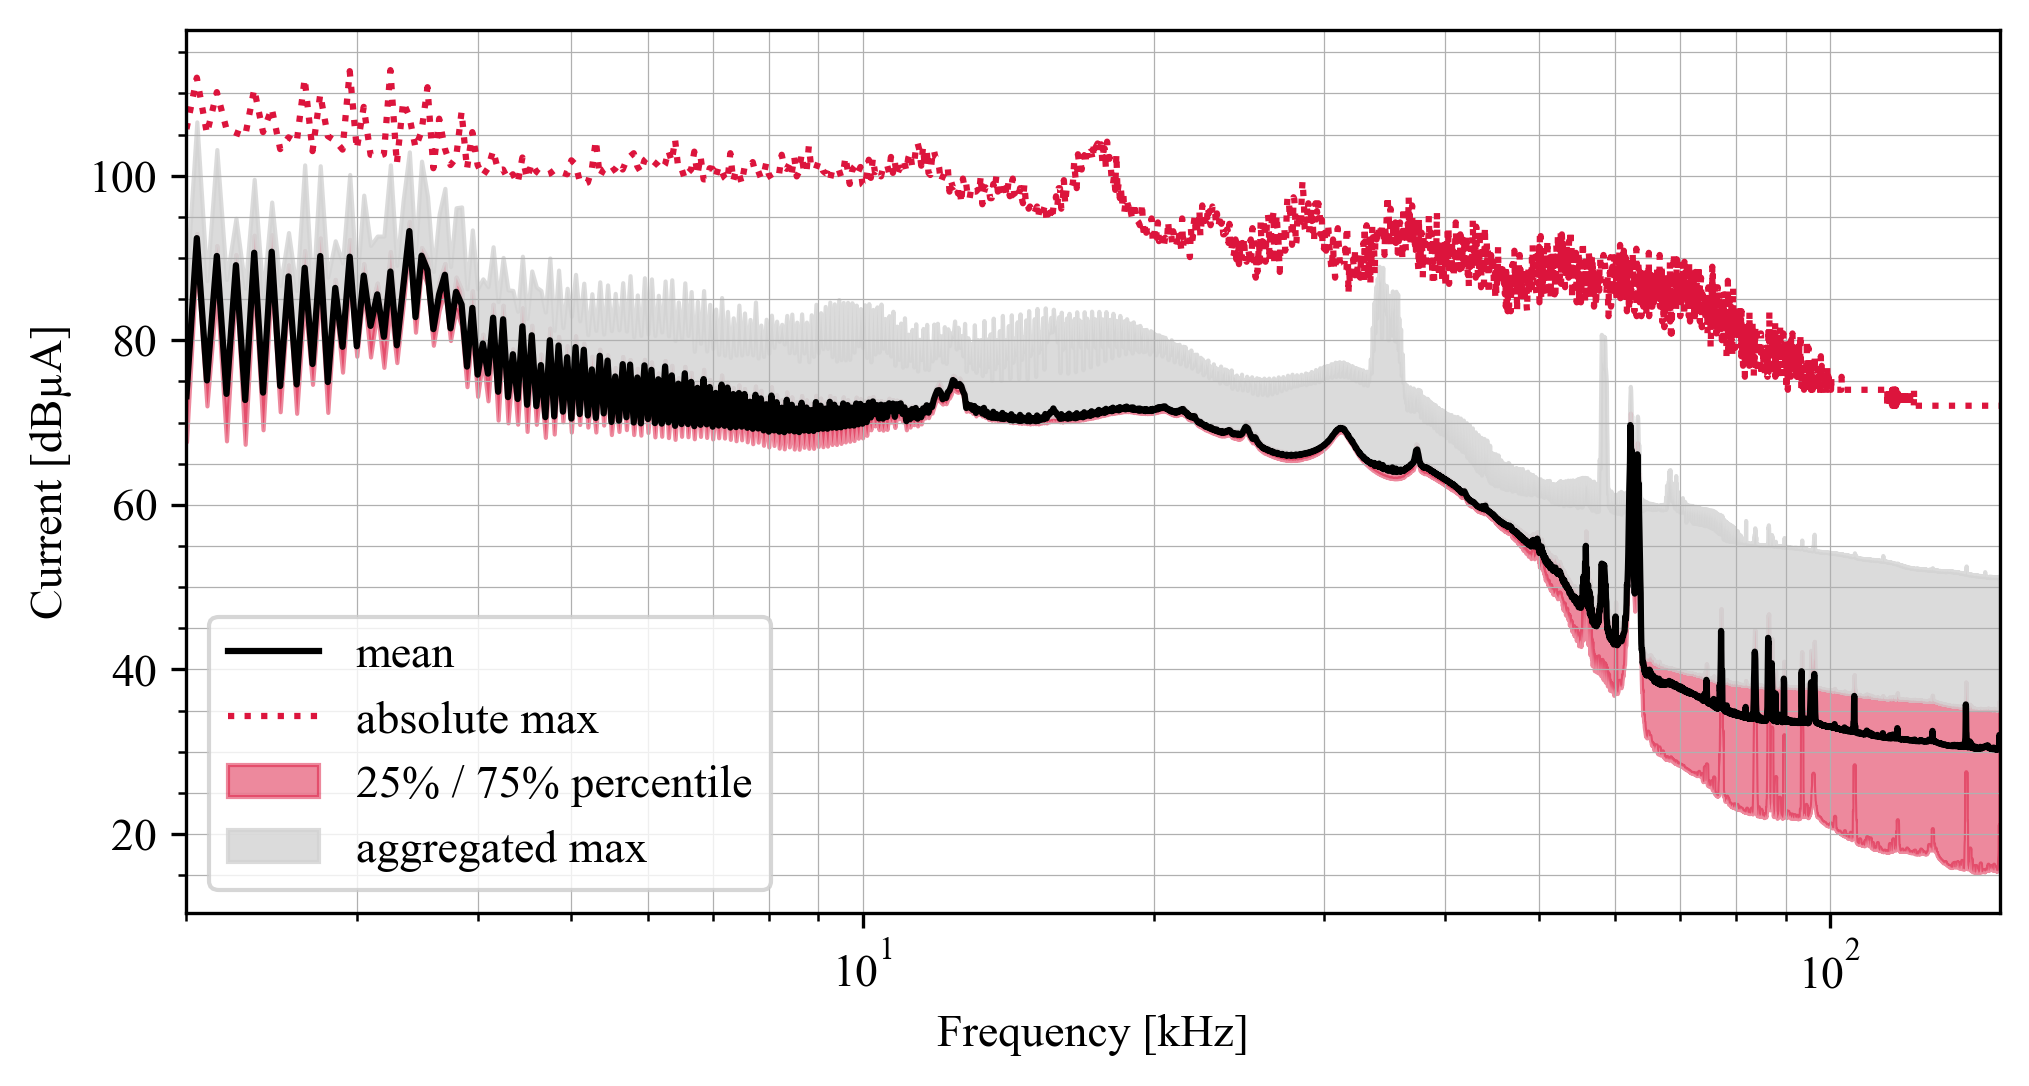

In [106]:
x = generateXAxisData()/1000

fig, ax = plt.subplots()
#ax.plot(x, limits, label="EN50065 limit", color="r")
ax.plot(x, sh_i_mean_db, label ="mean", color="k")
ax.fill_between(x, sh_i_perc25_db, sh_i_perc75_db, color='crimson', alpha=0.5, label="25% / 75% percentile")
ax.fill_between(x, sh_i_perc75_db, sh_i_max_db, color='lightgrey', alpha=0.8, label="aggregated max")
ax.plot(x, sh_i_outliers_db,":", label ="absolute max", color="crimson")
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('Current [dBµA]')
ax.set_xscale('log')
ax.legend()

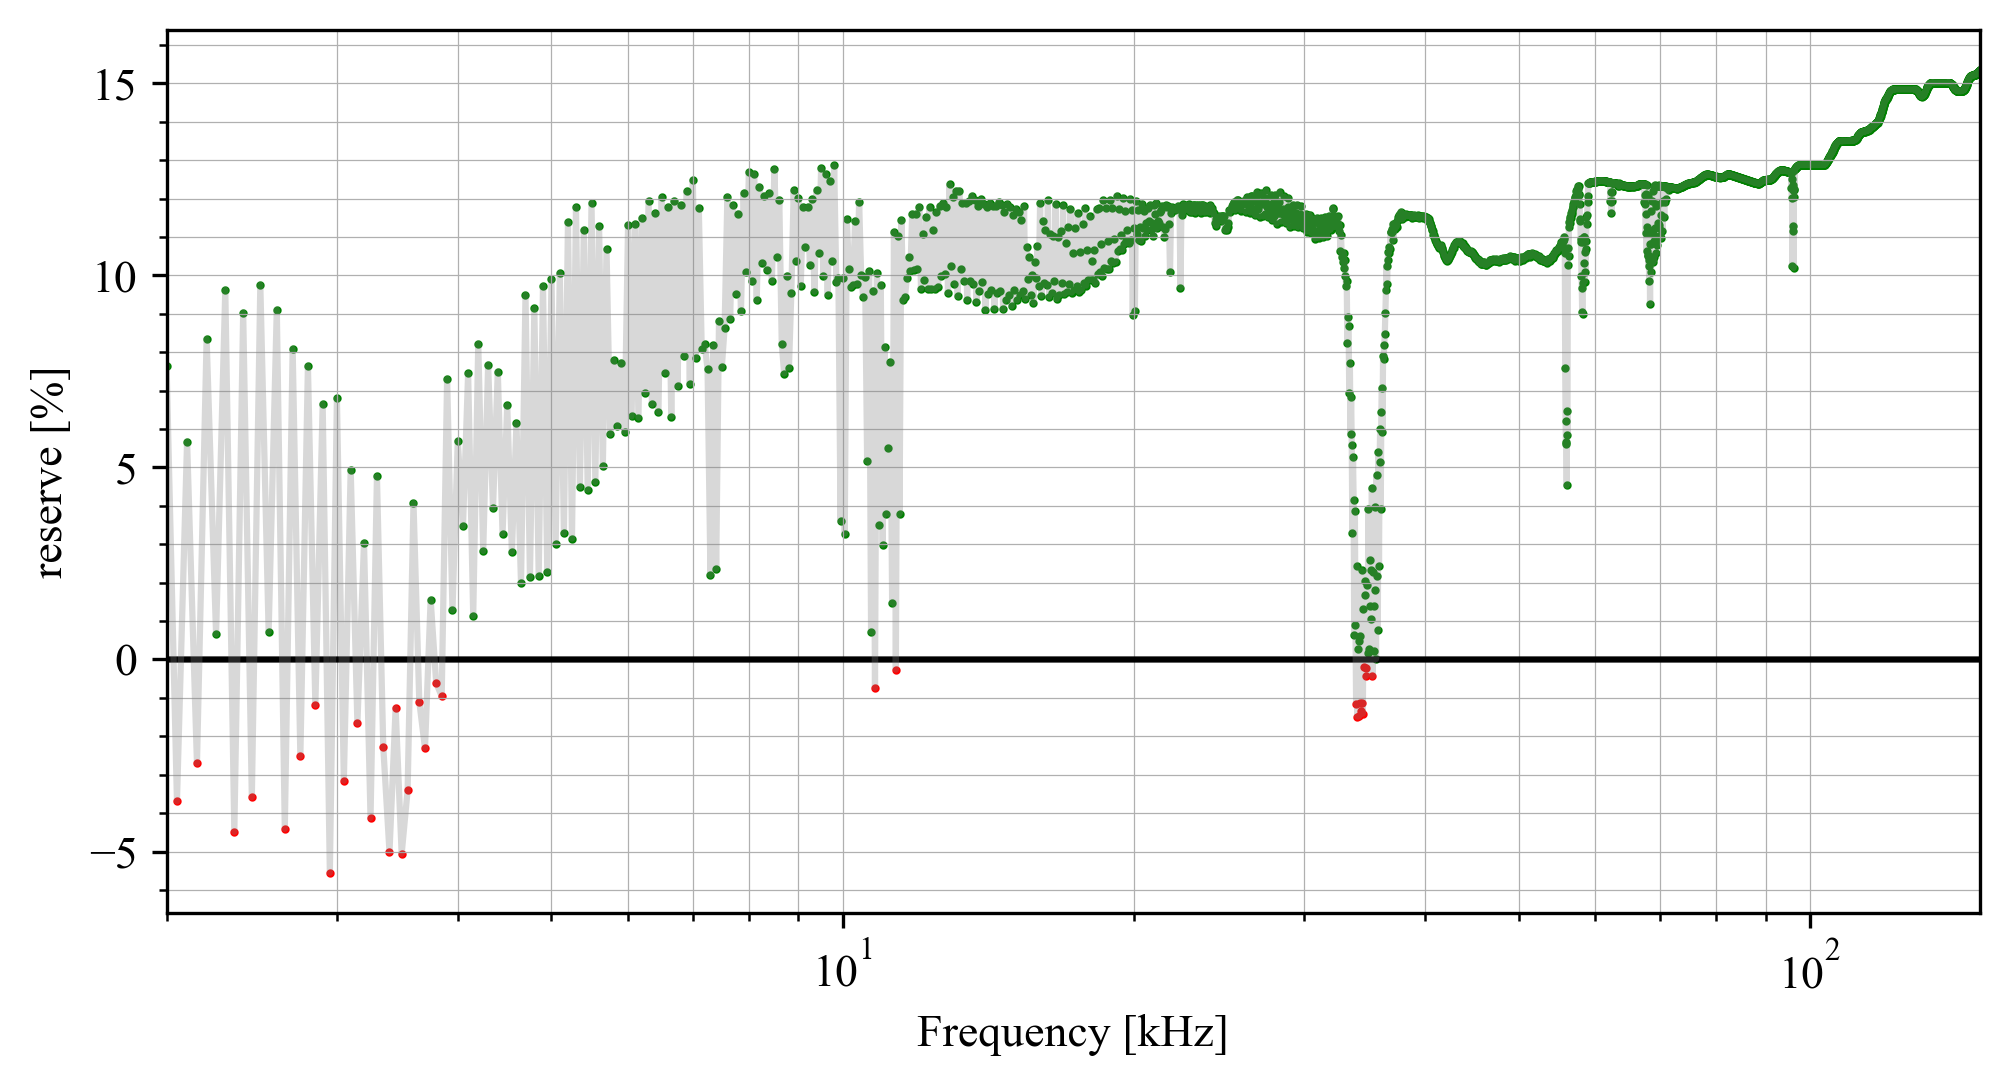

In [89]:
x = generateXAxisData()/1000

reserve = (1 - sh_u_max_db/limits)*100
pos_signal = reserve.copy()
neg_signal = reserve.copy()
pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

fig, ax = plt.subplots()
ax.scatter(x, pos_signal, color="green", s=1)
ax.scatter(x, neg_signal, color="red", s=1)
ax.plot(x, np.zeros(2960), color="k")
ax.plot(x, reserve, color="grey", alpha=0.3)
ax.set_xlim(min(x), max(x))
ax.minorticks_on()
ax.grid(linewidth=0.3, which='both')
ax.set_xlabel("Frequency [kHz]")
ax.set_ylabel('reserve [%]')
ax.set_xscale('log')